# 25.1
Solve the following initial value problem over interval form $t \in [0,2]$ where $y(0)=0$

$$ \frac{dy}{dt} = yt^2 - 1.1y $$

- Analytically
- Euler method with h=0.5 and 0.25
- Midpoint method with h=0.5
- 4th order RK method with h=0.5

In [1]:
import numpy as np
import pandas as pd

from ODE.RungeKutta.RKEulerMethod import RKEulerMethod
from ODE.RungeKutta.RKHeunMethod import RKHeunMethod
from ODE.RungeKutta.RKMidpointMethod import RKMidpointMethod
from ODE.RungeKutta.RKRalstonMethod import RKRalstonMethod
from ODE.RungeKutta.RungeKutta4 import RungeKutta4
from matplotlib import pyplot as plt

q251_data = dict(
    dy_dt = lambda y,t: y*t**2 - 1.1*y,
    y0 = 1,
    t_min = 0,
    t_max = 2,
)

## Analytically

$$ \frac{dy}{dt} = yt^2 - 1.1y $$
$$ \frac{dy}{dt} = y(t^2 - 1.1) $$
$$ \frac{dy}{dt} \frac{1}{y} = t^2 - 1.1 $$
$$ \int \frac{1}{y} dy = \int t^2 - 1.1 dt$$
$$ \ln y = \frac{t^3}{3} - 1.1 t + C $$
$$ y = e^{ \frac{t^3}{3} - 1.1 t + C} $$
$$ y = A e^{ \frac{t^3}{3} - 1.1 t} $$
$$ y(0) = 1 = A e^0 \implies A=1 $$
$$ y(t) = e^{ \frac{t^3}{3} - 1.1 t} $$

In [2]:
ans251_y = lambda t: np.exp(t**3/3 - 1.1*t)

ans251_a = pd.DataFrame(
    data=dict(
        t=np.linspace(q251_data.get('t_min'), q251_data.get('t_max'), 100),
    )
)
ans251_a['y'] = ans251_y(ans251_a['t'])

## Euler method with h=0.5 and 0.25

In [3]:
solver_251b_1 = RKEulerMethod(
    derivative_function = q251_data.get('dy_dt'),
    t0=q251_data.get('t_min'),
    t_final=q251_data.get('t_max'),
    y0=q251_data.get('y0'),
    h=0.5,
)
ans251_b_1 = solver_251b_1.run()

2025-05-09 10:59:24,250 - RKEulerMethod - INFO - Numerical.py:run:124 - Starting RKEulerMethod
2025-05-09 10:59:24,251 - RKEulerMethod - INFO - Numerical.py:initialize:70 - Initial state:{'y': 1, 't': 0, 'dy_dt': -1.1}
2025-05-09 10:59:24,252 - RKEulerMethod - INFO - Numerical.py:run:129 - Iteration 1 completed
Stop condition [StopIfGreaterThan: Stop when 't' >= 1.5 for 1 iterations] NOT met: Variable t:0 < 1.5 (diff: -1.5)
2025-05-09 10:59:24,252 - RKEulerMethod - INFO - Numerical.py:run:134 - State: 
{'t': 0.5, 'y': np.float64(0.44999999999999996), 'dy_dt': np.float64(-0.3825)}

2025-05-09 10:59:24,254 - RKEulerMethod - INFO - Numerical.py:run:129 - Iteration 2 completed
Stop condition [StopIfGreaterThan: Stop when 't' >= 1.5 for 1 iterations] NOT met: Variable t:0.5 < 1.5 (diff: -1)
2025-05-09 10:59:24,254 - RKEulerMethod - INFO - Numerical.py:run:134 - State: 
{'t': 1.0, 'y': np.float64(0.2587499999999999), 'dy_dt': np.float64(-0.025875000000000037)}

2025-05-09 10:59:24,255 - RKEu

In [4]:
ans251_b_1

,y,t,dy_dt
0,1.000000,0.0,-1.100000
1,0.450000,0.5,-0.382500
2,0.258750,1.0,-0.025875
3,0.245812,1.5,0.282684
4,0.387155,2.0,1.122749


In [5]:
## Euler method with h=0.5 and 0.25
solver_251b_2 = RKEulerMethod(
    derivative_function=q251_data.get('dy_dt'),
    t0=q251_data.get('t_min'),
    t_final=q251_data.get('t_max'),
    y0=q251_data.get('y0'),
    h=0.25,
)
ans251_b_2 = solver_251b_2.run()

2025-05-09 10:59:24,374 - RKEulerMethod - INFO - Numerical.py:run:124 - Starting RKEulerMethod
2025-05-09 10:59:24,375 - RKEulerMethod - INFO - Numerical.py:initialize:70 - Initial state:{'y': 1, 't': 0, 'dy_dt': -1.1}
2025-05-09 10:59:24,376 - RKEulerMethod - INFO - Numerical.py:run:129 - Iteration 1 completed
Stop condition [StopIfGreaterThan: Stop when 't' >= 1.75 for 1 iterations] NOT met: Variable t:0 < 1.75 (diff: -1.75)
2025-05-09 10:59:24,376 - RKEulerMethod - INFO - Numerical.py:run:134 - State: 
{'t': 0.25, 'y': np.float64(0.725), 'dy_dt': np.float64(-0.7521875)}

2025-05-09 10:59:24,377 - RKEulerMethod - INFO - Numerical.py:run:129 - Iteration 2 completed
Stop condition [StopIfGreaterThan: Stop when 't' >= 1.75 for 1 iterations] NOT met: Variable t:0.25 < 1.75 (diff: -1.5)
2025-05-09 10:59:24,377 - RKEulerMethod - INFO - Numerical.py:run:134 - State: 
{'t': 0.5, 'y': np.float64(0.5369531249999999), 'dy_dt': np.float64(-0.45641015625)}

2025-05-09 10:59:24,378 - RKEulerMethod

In [6]:
ans251_b_2

,y,t,dy_dt
0,1.000000,0.00,-1.100000
1,0.725000,0.25,-0.752188
2,0.536953,0.50,-0.456410
3,0.422851,0.75,-0.227282
4,0.366030,1.00,-0.036603
5,0.356879,1.25,0.165057
6,0.398143,1.50,0.457865
7,0.512610,1.75,1.005997
8,0.764109,2.00,2.215916


## Midpoint method with h=0.5

In [7]:
solver_251c = RKMidpointMethod(
    derivative_function=q251_data.get('dy_dt'),
    t0=q251_data.get('t_min'),
    t_final=q251_data.get('t_max'),
    y0=q251_data.get('y0'),
    h=0.5,
)
ans251_c = solver_251c.run()

2025-05-09 10:59:24,509 - RKMidpointMethod - INFO - Numerical.py:run:124 - Starting RKMidpointMethod
2025-05-09 10:59:24,510 - RKMidpointMethod - INFO - Numerical.py:initialize:70 - Initial state:{'y': 1, 't': 0, 'dy_dt': -1.1}
2025-05-09 10:59:24,512 - RKMidpointMethod - INFO - Numerical.py:run:129 - Iteration 1 completed
Stop condition [StopIfGreaterThan: Stop when 't' >= 1.5 for 1 iterations] NOT met: Variable t:0 < 1.5 (diff: -1.5)
2025-05-09 10:59:24,533 - RKMidpointMethod - INFO - Numerical.py:run:134 - State: 
{'t': 0.5, 'y': np.float64(0.62390625), 'dy_dt': np.float64(-0.5303203125)}

2025-05-09 10:59:24,534 - RKMidpointMethod - INFO - Numerical.py:run:129 - Iteration 2 completed
Stop condition [StopIfGreaterThan: Stop when 't' >= 1.5 for 1 iterations] NOT met: Variable t:0.5 < 1.5 (diff: -1)
2025-05-09 10:59:24,535 - RKMidpointMethod - INFO - Numerical.py:run:134 - State: 
{'t': 1.0, 'y': np.float64(0.49186234130859374), 'dy_dt': np.float64(-0.04918623413085943)}

2025-05-09 1

In [8]:
ans251_c

,y,t,dy_dt
0,1.000000,0.0,-1.100000
1,0.623906,0.5,-0.530320
2,0.491862,1.0,-0.049186
3,0.602762,1.5,0.693176
4,1.364267,2.0,3.956374


## 4th order RK method with h=0.5

In [9]:
solver_251d = RungeKutta4(
    derivative_function=q251_data.get('dy_dt'),
    t0=q251_data.get('t_min'),
    t_final=q251_data.get('t_max'),
    y0=q251_data.get('y0'),
    h=0.5,
)

ans251_d = solver_251d.run()

2025-05-09 10:59:24,779 - RungeKutta4 - INFO - Numerical.py:run:124 - Starting RungeKutta4
2025-05-09 10:59:24,781 - RungeKutta4 - INFO - Numerical.py:initialize:70 - Initial state:{'y': 1, 't': 0, 'dy_dt': -1.1}
2025-05-09 10:59:24,783 - RungeKutta4 - INFO - Numerical.py:run:129 - Iteration 1 completed
Stop condition [StopIfGreaterThan: Stop when 't' >= 1.5 for 1 iterations] NOT met: Variable t:0 < 1.5 (diff: -1.5)
2025-05-09 10:59:24,786 - RungeKutta4 - INFO - Numerical.py:run:134 - State: 
{'t': 0.5, 'y': 0.6015702372233073, 'dy_dt': -0.5113347016398112}

2025-05-09 10:59:24,787 - RungeKutta4 - INFO - Numerical.py:run:129 - Iteration 2 completed
Stop condition [StopIfGreaterThan: Stop when 't' >= 1.5 for 1 iterations] NOT met: Variable t:0.5 < 1.5 (diff: -1)
2025-05-09 10:59:24,789 - RungeKutta4 - INFO - Numerical.py:run:134 - State: 
{'t': 1.0, 'y': 0.46452378509080733, 'dy_dt': -0.04645237850908074}

2025-05-09 10:59:24,791 - RungeKutta4 - INFO - Numerical.py:run:129 - Iteration 3

In [10]:
ans251_d

,y,t,dy_dt
0,1.000000,0.0,-1.100000
1,0.601570,0.5,-0.511335
2,0.464524,1.0,-0.046452
3,0.591380,1.5,0.680087
4,1.584452,2.0,4.594911


## plot all togather

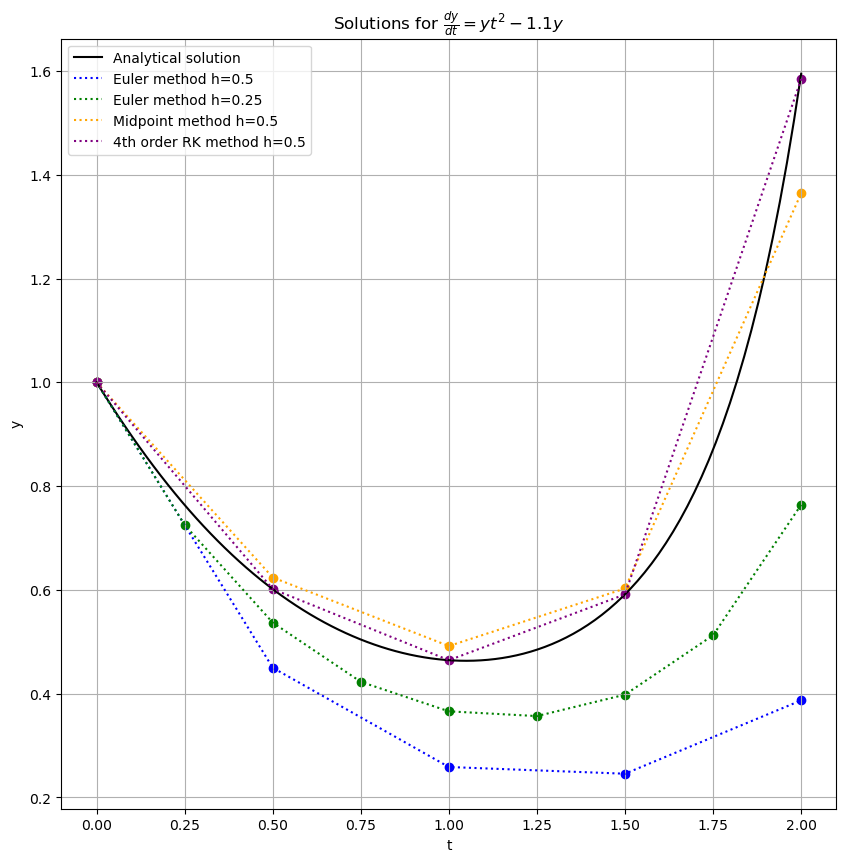

In [11]:
plt.figure(figsize=(10, 10))
plt.plot(ans251_a['t'], ans251_a['y'], label='Analytical solution', color='black')

plt.plot(ans251_b_1['t'], ans251_b_1['y'], label='Euler method h=0.5', color='blue', linestyle=':')
plt.scatter(ans251_b_1['t'], ans251_b_1['y'], color='blue', marker='o')

plt.plot(ans251_b_2['t'], ans251_b_2['y'], label='Euler method h=0.25', color='green', linestyle=':')
plt.scatter(ans251_b_2['t'], ans251_b_2['y'], color='green', marker='o')

plt.plot(ans251_c['t'], ans251_c['y'], label='Midpoint method h=0.5', color='orange', linestyle=':')
plt.scatter(ans251_c['t'], ans251_c['y'], color='orange', marker='o')

plt.plot(ans251_d['t'], ans251_d['y'], label='4th order RK method h=0.5', color='purple', linestyle=':')
plt.scatter(ans251_d['t'], ans251_d['y'], color='purple', marker='o')

plt.legend()
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.savefig('251.png')
plt.title(r'Solutions for $\frac{dy}{dt} = yt^2 - 1.1y$')
plt.show()

# 25.2
Solve the following initial value problem over interval form $x \in [0,1]$ where $y(0)=0$ , $h=0.25$

$$ \frac{dy}{dt} = (1+4t)\sqrt{y} $$

- Analytically
- Euler method
- Heun's method
- Rastoln method
- 4th order RK method with h=0.5

In [12]:
q252_data = dict(
    dy_dt = lambda y,t: (1/2*t + t**2 + 1)**2,
    y0 = 1,
    t_min = 0,
    t_max = 1,
    h = 0.25,
)

## Analytically

$$ \frac{dy}{dt} = (1+4t)\sqrt{y} $$
$$ \frac{dy}{dt} \frac{1}{\sqrt{y}} = 1+4t $$
$$ \int \frac{1}{\sqrt{y}} dy = \int 1+4t dt $$
$$ \int y^{-\frac{1}{2}} dy = \int 1+4t dt $$
$$ -2 \sqrt{y} = t + 4 \frac{t^2}{2} + C $$
$$ -2 \sqrt{y} = t + 2t^2 + C $$
$$ \sqrt{y} = -\frac{1}{2} t - t^2 - C $$
$$ y = (\frac{1}{2} t + t^2 + C)^2 $$
$$ y(0) = 1 = (C)^2 \implies C= 1 $$
$$ y(t) = (\frac{1}{2} t + t^2 + 1)^2 $$

In [13]:
ans252_y = lambda t: (1/2*t + t**2 + 1)**2
ans252_a = pd.DataFrame(
    data=dict(
        t=np.linspace(q252_data.get('t_min'), q252_data.get('t_max'), 100),
    )
)
ans252_a['y'] = ans251_y(ans252_a['t'])

## Euler method

In [14]:
solver_252b = RKEulerMethod(
    derivative_function=q251_data.get('dy_dt'),
    t0=q252_data.get('t_min'),
    t_final=q252_data.get('t_max'),
    y0=q252_data.get('y0'),
    h=q252_data.get('h')
)

ans_252b = solver_252b.run()

2025-05-09 10:59:26,168 - RKEulerMethod - INFO - Numerical.py:run:124 - Starting RKEulerMethod
2025-05-09 10:59:26,169 - RKEulerMethod - INFO - Numerical.py:initialize:70 - Initial state:{'y': 1, 't': 0, 'dy_dt': -1.1}
2025-05-09 10:59:26,173 - RKEulerMethod - INFO - Numerical.py:run:129 - Iteration 1 completed
Stop condition [StopIfGreaterThan: Stop when 't' >= 0.75 for 1 iterations] NOT met: Variable t:0 < 0.75 (diff: -0.75)
2025-05-09 10:59:26,174 - RKEulerMethod - INFO - Numerical.py:run:134 - State: 
{'t': 0.25, 'y': np.float64(0.725), 'dy_dt': np.float64(-0.7521875)}

2025-05-09 10:59:26,175 - RKEulerMethod - INFO - Numerical.py:run:129 - Iteration 2 completed
Stop condition [StopIfGreaterThan: Stop when 't' >= 0.75 for 1 iterations] NOT met: Variable t:0.25 < 0.75 (diff: -0.5)
2025-05-09 10:59:26,176 - RKEulerMethod - INFO - Numerical.py:run:134 - State: 
{'t': 0.5, 'y': np.float64(0.5369531249999999), 'dy_dt': np.float64(-0.45641015625)}

2025-05-09 10:59:26,177 - RKEulerMethod

In [15]:
ans_252b

,y,t,dy_dt
0,1.000000,0.00,-1.100000
1,0.725000,0.25,-0.752188
2,0.536953,0.50,-0.456410
3,0.422851,0.75,-0.227282
4,0.366030,1.00,-0.036603


## Heun's method

In [16]:
solver_252c = RKHeunMethod(
    derivative_function=q251_data.get('dy_dt'),
    t0=q252_data.get('t_min'),
    t_final=q252_data.get('t_max'),
    y0=q252_data.get('y0'),
    h=q252_data.get('h')
)
ans_252c = solver_252c.run()

2025-05-09 10:59:26,287 - RKHeunMethod - INFO - Numerical.py:run:124 - Starting RKHeunMethod
2025-05-09 10:59:26,288 - RKHeunMethod - INFO - Numerical.py:initialize:70 - Initial state:{'y': 1, 't': 0, 'dy_dt': -1.1}
2025-05-09 10:59:26,289 - RKHeunMethod - INFO - Numerical.py:run:129 - Iteration 1 completed
Stop condition [StopIfGreaterThan: Stop when 't' >= 0.75 for 1 iterations] NOT met: Variable t:0 < 0.75 (diff: -0.75)
2025-05-09 10:59:26,290 - RKHeunMethod - INFO - Numerical.py:run:134 - State: 
{'t': 0.25, 'y': 0.7684765625, 'dy_dt': -0.7972944335937501}

2025-05-09 10:59:26,291 - RKHeunMethod - INFO - Numerical.py:run:129 - Iteration 2 completed
Stop condition [StopIfGreaterThan: Stop when 't' >= 0.75 for 1 iterations] NOT met: Variable t:0.25 < 0.75 (diff: -0.5)
2025-05-09 10:59:26,292 - RKHeunMethod - INFO - Numerical.py:run:134 - State: 
{'t': 0.5, 'y': 0.6083422569274902, 'dy_dt': -0.5170909183883667}

2025-05-09 10:59:26,293 - RKHeunMethod - INFO - Numerical.py:run:129 - It

In [17]:
ans_252c

,y,t,dy_dt
0,1.000000,0.00,-1.100000
1,0.768477,0.25,-0.797294
2,0.608342,0.50,-0.517091
3,0.511518,0.75,-0.274941
4,0.471616,1.00,-0.047162


## Ralston's method

In [18]:
solver_252d = RKRalstonMethod(
    derivative_function=q251_data.get('dy_dt'),
    t0=q252_data.get('t_min'),
    t_final=q252_data.get('t_max'),
    y0=q252_data.get('y0'),
    h=q252_data.get('h')
)

ans_252d = solver_252d.run()

2025-05-09 10:59:26,383 - RKRalstonMethod - INFO - Numerical.py:run:124 - Starting RKRalstonMethod
2025-05-09 10:59:26,384 - RKRalstonMethod - INFO - Numerical.py:initialize:70 - Initial state:{'y': 1, 't': 0, 'dy_dt': -1.1}
2025-05-09 10:59:26,386 - RKRalstonMethod - INFO - Numerical.py:run:129 - Iteration 1 completed
Stop condition [StopIfGreaterThan: Stop when 't' >= 0.75 for 1 iterations] NOT met: Variable t:0 < 0.75 (diff: -0.75)
2025-05-09 10:59:26,387 - RKRalstonMethod - INFO - Numerical.py:run:134 - State: 
{'t': 0.25, 'y': 0.7670659722222222, 'dy_dt': -0.7958309461805556}

2025-05-09 10:59:26,390 - RKRalstonMethod - INFO - Numerical.py:run:129 - Iteration 2 completed
Stop condition [StopIfGreaterThan: Stop when 't' >= 0.75 for 1 iterations] NOT met: Variable t:0.25 < 0.75 (diff: -0.5)
2025-05-09 10:59:26,392 - RKRalstonMethod - INFO - Numerical.py:run:134 - State: 
{'t': 0.5, 'y': 0.6071278063267836, 'dy_dt': -0.5160586353777661}

2025-05-09 10:59:26,393 - RKRalstonMethod - IN

In [19]:
ans_252d

,y,t,dy_dt
0,1.000000,0.00,-1.100000
1,0.767066,0.25,-0.795831
2,0.607128,0.50,-0.516059
3,0.510820,0.75,-0.274566
4,0.471012,1.00,-0.047101


## 4th Order RK

In [20]:
solver_252e = RungeKutta4(
    derivative_function=q251_data.get('dy_dt'),
    t0=q252_data.get('t_min'),
    t_final=q252_data.get('t_max'),
    y0=q252_data.get('y0'),
    h=q252_data.get('h')
)
ans_252e = solver_252e.run()

2025-05-09 10:59:26,576 - RungeKutta4 - INFO - Numerical.py:run:124 - Starting RungeKutta4
2025-05-09 10:59:26,578 - RungeKutta4 - INFO - Numerical.py:initialize:70 - Initial state:{'y': 1, 't': 0, 'dy_dt': -1.1}
2025-05-09 10:59:26,579 - RungeKutta4 - INFO - Numerical.py:run:129 - Iteration 1 completed
Stop condition [StopIfGreaterThan: Stop when 't' >= 0.75 for 1 iterations] NOT met: Variable t:0 < 0.75 (diff: -0.75)
2025-05-09 10:59:26,582 - RungeKutta4 - INFO - Numerical.py:run:134 - State: 
{'t': 0.25, 'y': 0.7635469927330811, 'dy_dt': -0.7921800049605717}

2025-05-09 10:59:26,583 - RungeKutta4 - INFO - Numerical.py:run:129 - Iteration 2 completed
Stop condition [StopIfGreaterThan: Stop when 't' >= 0.75 for 1 iterations] NOT met: Variable t:0.25 < 0.75 (diff: -0.5)
2025-05-09 10:59:26,586 - RungeKutta4 - INFO - Numerical.py:run:134 - State: 
{'t': 0.5, 'y': 0.6015059857908641, 'dy_dt': -0.5112800879222346}

2025-05-09 10:59:26,587 - RungeKutta4 - INFO - Numerical.py:run:129 - Iter

In [21]:
ans_252e

,y,t,dy_dt
0,1.000000,0.00,-1.100000
1,0.763547,0.25,-0.792180
2,0.601506,0.50,-0.511280
3,0.504412,0.75,-0.271121
4,0.464564,1.00,-0.046456


## plot all togather

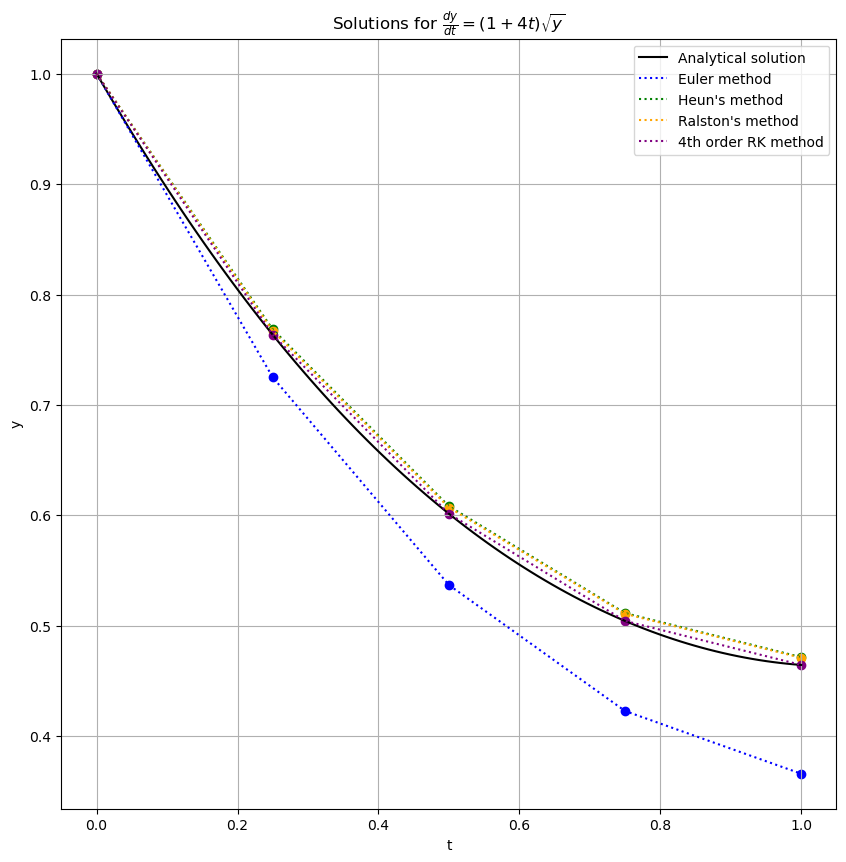

In [22]:
plt.figure(figsize=(10, 10))
plt.plot(ans252_a['t'], ans252_a['y'], label='Analytical solution', color='black')

plt.plot(ans_252b['t'], ans_252b['y'], label='Euler method', color='blue', linestyle=':')
plt.scatter(ans_252b['t'], ans_252b['y'], color='blue', marker='o')

plt.plot(ans_252c['t'], ans_252c['y'], label='Heun\'s method', color='green', linestyle=':')
plt.scatter(ans_252c['t'], ans_252c['y'], color='green', marker='o')

plt.plot(ans_252d['t'], ans_252d['y'], label='Ralston\'s method', color='orange', linestyle=':')
plt.scatter(ans_252d['t'], ans_252d['y'], color='orange', marker='o')

plt.plot(ans_252e['t'], ans_252e['y'], label='4th order RK method', color='purple', linestyle=':')
plt.scatter(ans_252e['t'], ans_252e['y'], color='purple', marker='o')

plt.legend()
plt.title(r'Solutions for $\frac{dy}{dt} = (1+4t)\sqrt{y}$')
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.savefig('252.png')
plt.show()